In [1]:
#importing relevant modules
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Agora.csv", engine='python')
df.columns = df.columns.str.replace(' ', '')
df = df.drop(df[df["Price"].str.contains('BTC') == False].index) # data cleaning - price
df['Price'] = df['Price'].str.replace(' BTC', '')

main_url = r"https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency=BTC&to_currency=USD&apikey=R91K0VILGZN3N76I"
req_ob = requests.get(main_url) 
result = req_ob.json() 
ans =  result["Realtime Currency Exchange Rate"] ['5. Exchange Rate']
ans = float(ans)


In [3]:
# Create the pandas DataFrame
df_vendors = df.groupby('Vendor').size().reset_index(name='Count')

print("Average listings of a vendor: " + str(df_vendors.mean()[0]) + " items.")

df_categories = df.groupby('Category').size().reset_index(name='Count').sort_values(by=['Count'], ascending=False)
df_categories = df_categories.drop(df_categories[df_categories['Count'] < 2].index)


#print(df['Price'])

Average listings of a vendor: 34.38244514106583 items.


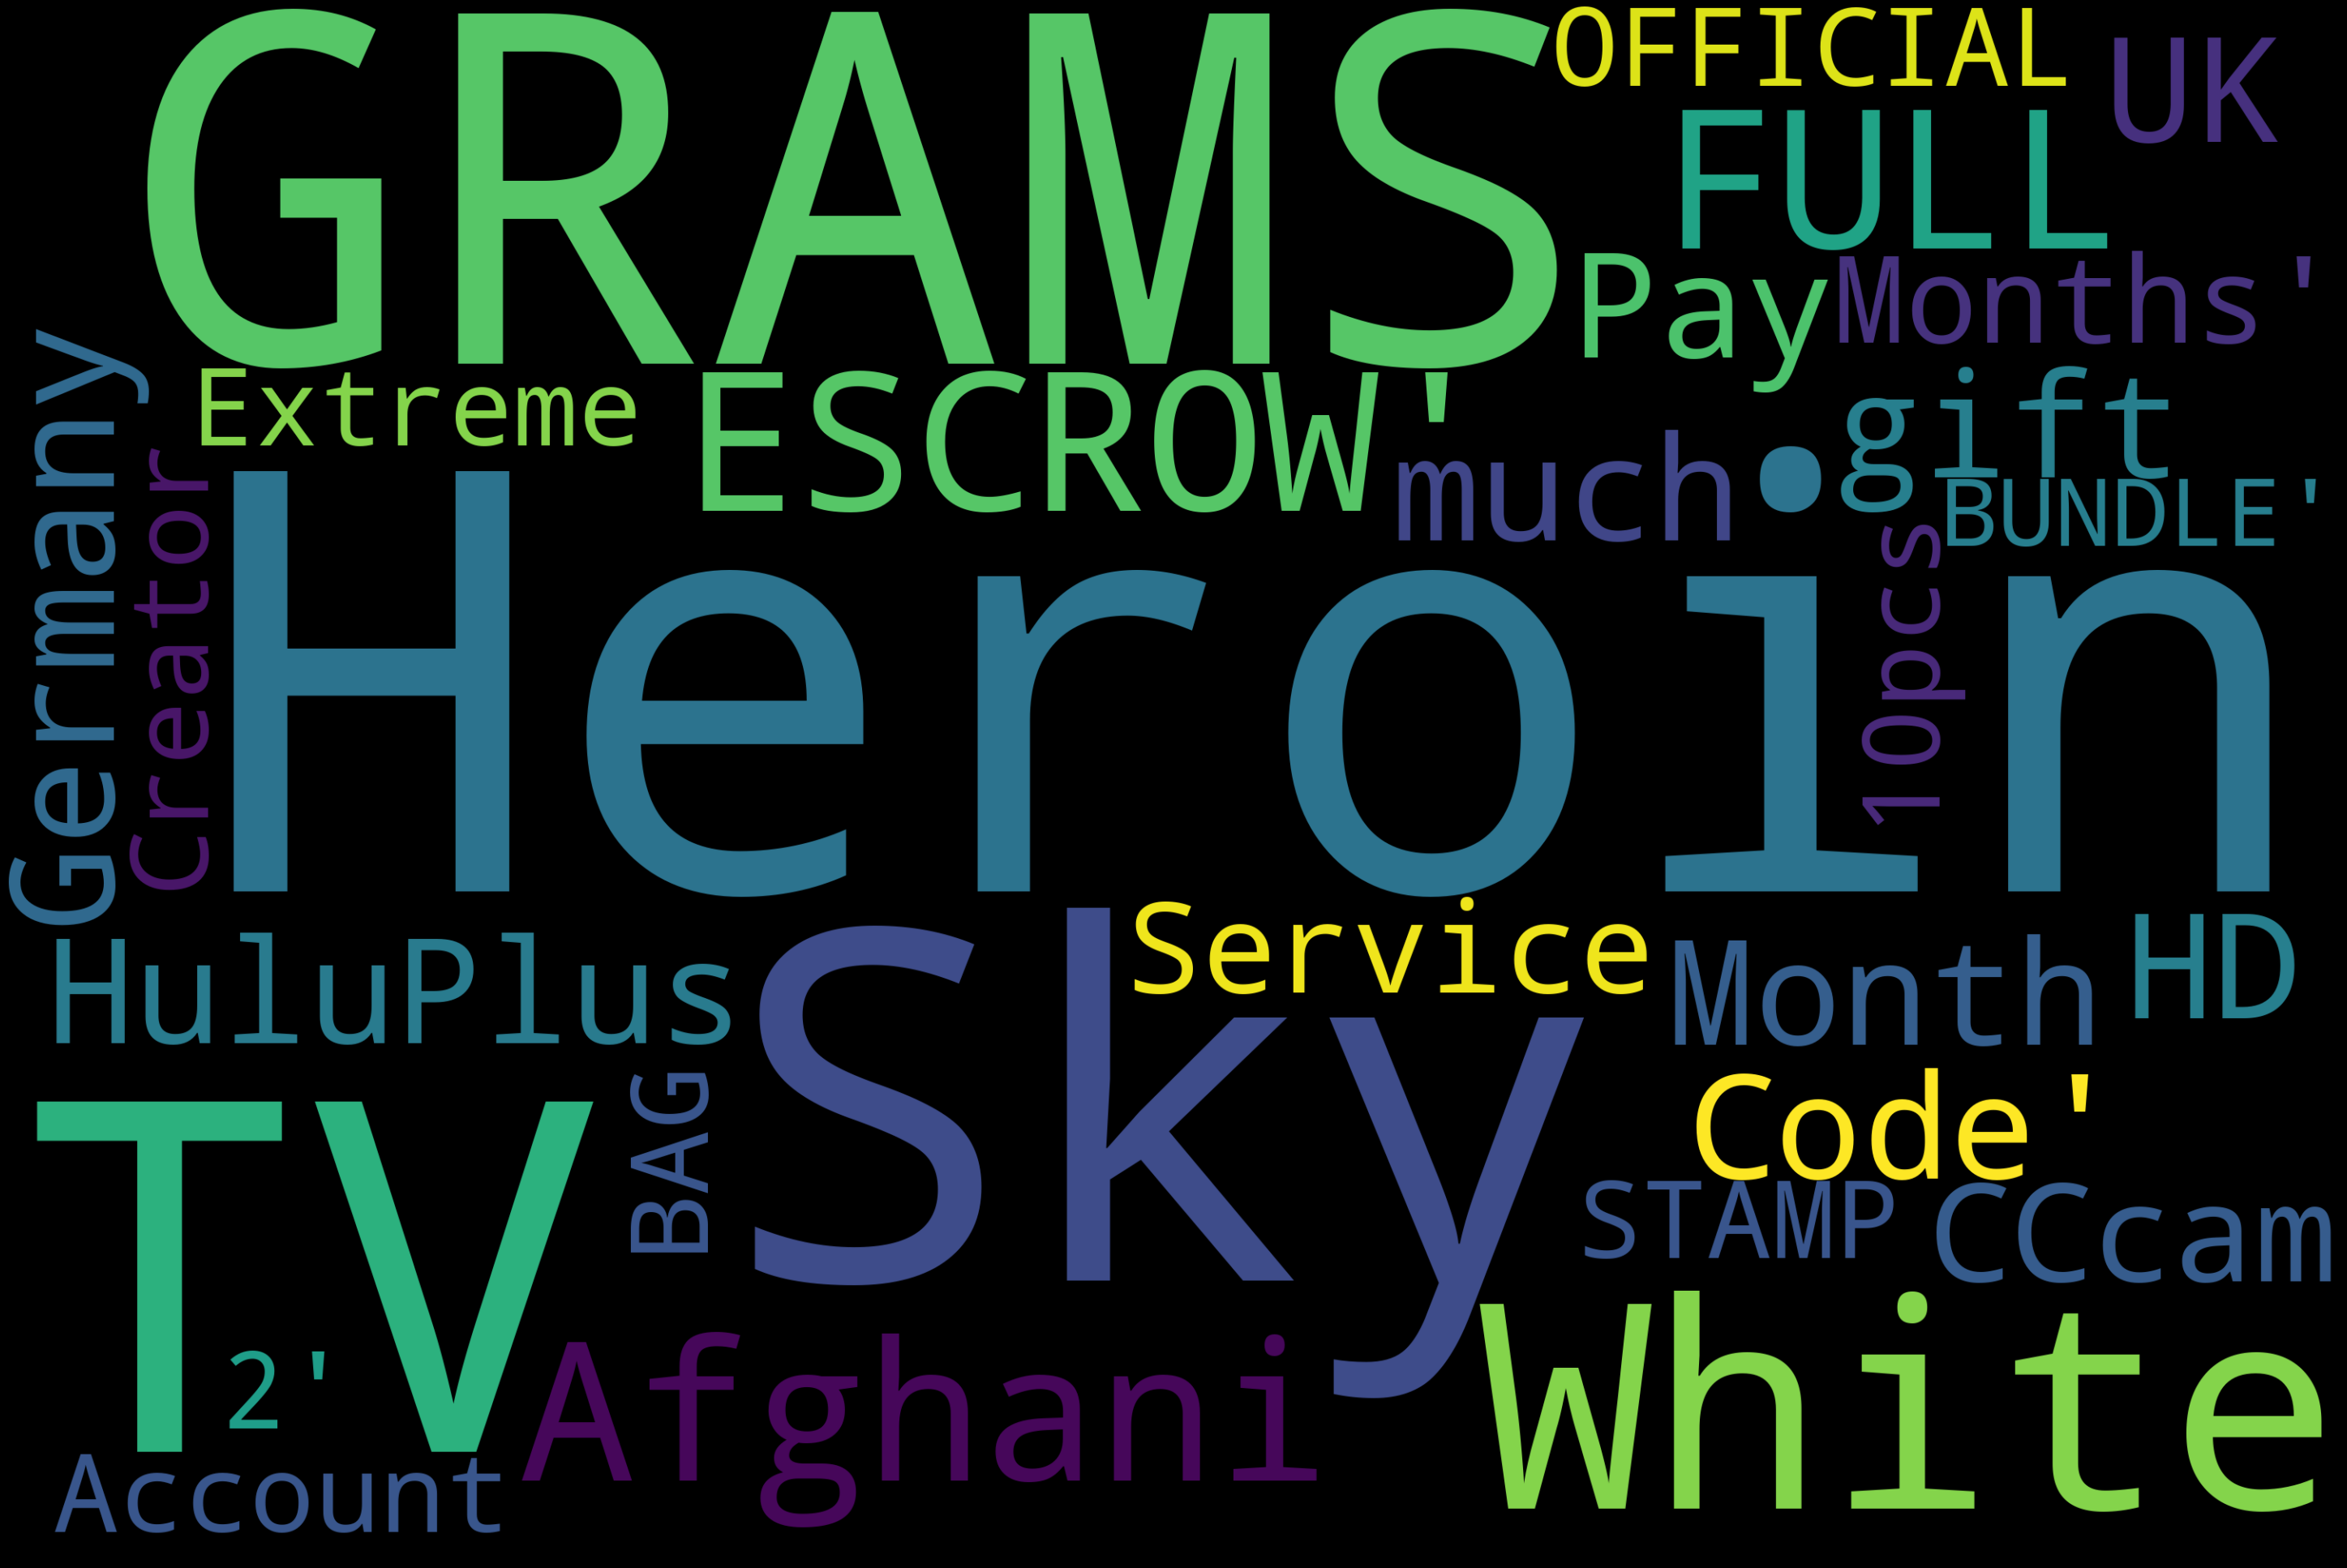

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.Item.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()




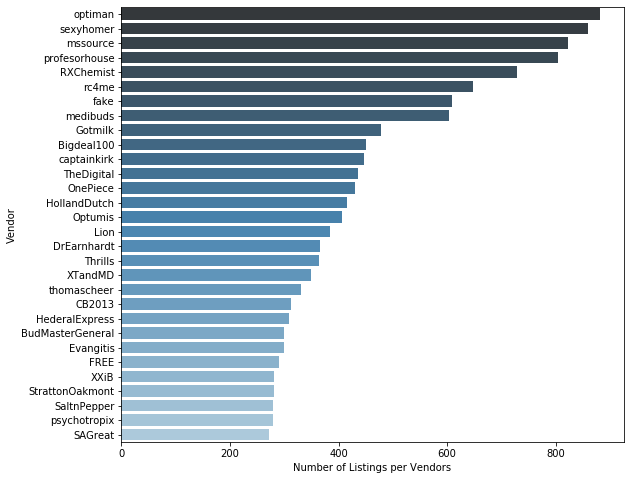

In [5]:
import seaborn as sns

f, ax = plt.subplots(figsize=[9,8])
sns.countplot(y=df.loc[df.Vendor.isin(df["Vendor"].value_counts().index[0:30]),"Vendor"],order=df["Vendor"].value_counts().index[:30],palette="Blues_d",ax=ax)
ax.set_xlabel('Number of Listings per Vendors')
plt.show()

<Figure size 7200x3600 with 0 Axes>

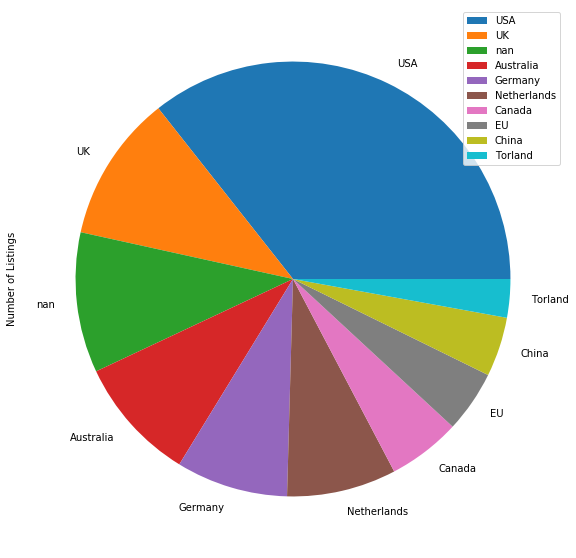

In [6]:
import seaborn as sns

df['Vendor'] = df['Vendor'].astype(str)
df['Category'] = df['Category'].astype(str)
df['Item'] = df['Item'].astype(str)
df['ItemDescription'] = df['ItemDescription'].astype(str)
df['Origin'] = df['Origin'].astype(str)
df['Destination'] = df['Destination'].astype(str)
df['Rating'] = df['Rating'].astype(str)
df['Remarks'] = df['Remarks'].astype(str)


#df['Item'].groupby(df['Origin']).size()
plt.figure(figsize=(100,50))

origin_data = df['Origin'].value_counts()[:10]
origin_data = origin_data.to_frame().reset_index()

destination_data = df['Destination'].value_counts()[:10]
destination_data = destination_data.to_frame().reset_index()

origin_data.columns = ['Origin', 'Number of Listings']
plot = origin_data.plot.pie(y='Number of Listings', labels=origin_data['Origin'], figsize=(50, 10))
#data.plot(kind='pie', y = 'Number of Listings', labels=data['Origin'], legend = False, fontsize=14)

In [7]:
#pie table of listings per origin
#pie table of listing per destination

Text(0, 0.5, 'Category')

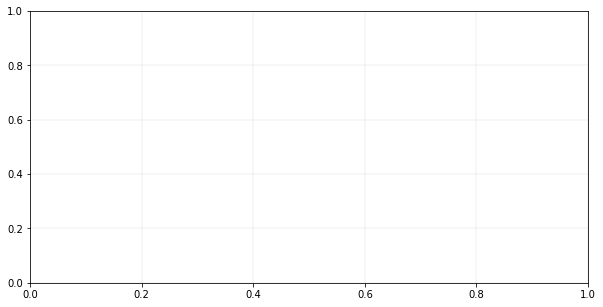

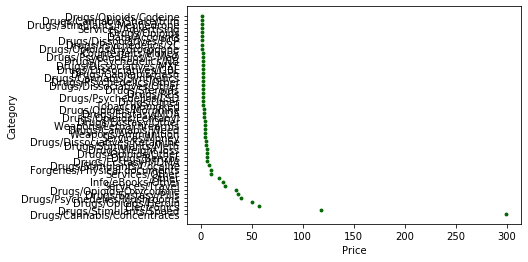

In [31]:


df = df.drop(df[df['Price'].isnull()].index)

df['Price'] = df['Price'].astype('float')
priceCat = df.groupby('Category')['Price'].mean().reset_index(name='Price')
priceCat = priceCat.sort_values(by=['Price'], ascending=False)

fig, plot = plt.subplots(figsize=(10, 5))
plot.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
priceCat[:50].plot.scatter('Price', 'Category', c = "darkgreen", s = 8)
plt.xlabel('Price')
plt.ylabel('Category')



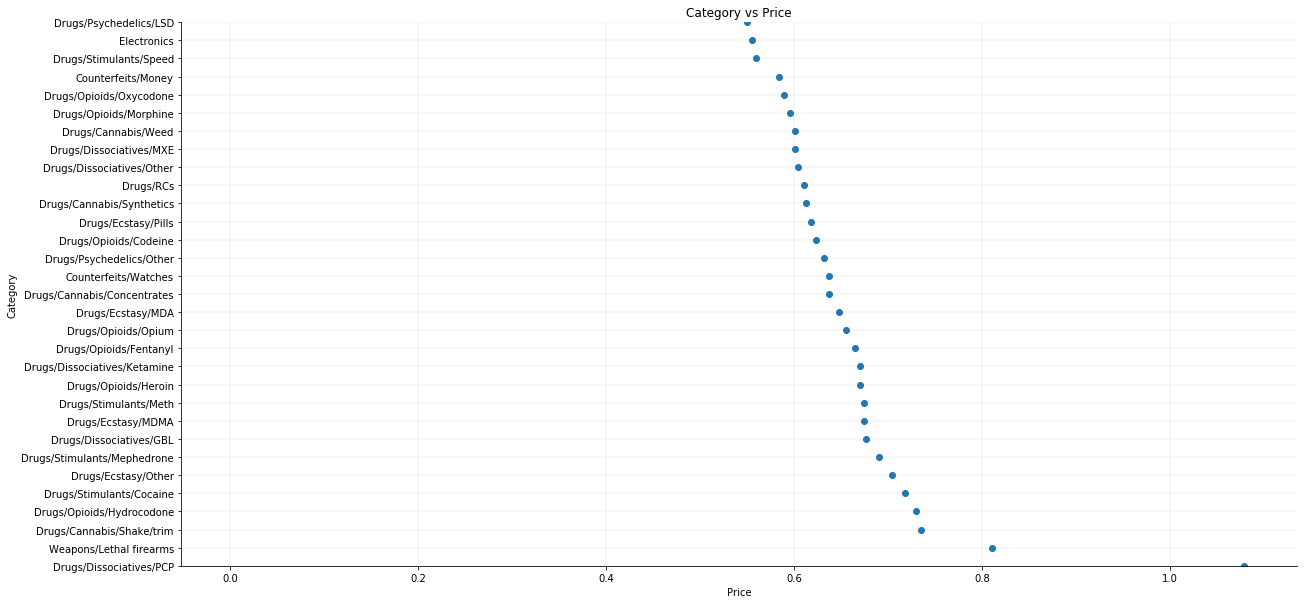

In [70]:
df = df.drop(df[df['Price'].isnull()].index)

df['Price'] = df['Price'].astype('float')
priceCat = df.groupby('Category')['Price'].mean().reset_index(name='Price')
priceCat = priceCat.sort_values(by=['Price'], ascending=False)

def scatterplot(df, x_dim, y_dim):
  x = df[x_dim]
  y = df[y_dim]
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.scatter(x, y)
  ax.set_ylim(0,30)
  ax.set_title('Category vs Price')
  ax.set_xlabel('Price')
  ax.set_ylabel('Category')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  
  plt.show()
    
scatterplot(priceCat, 'Price', 'Category')



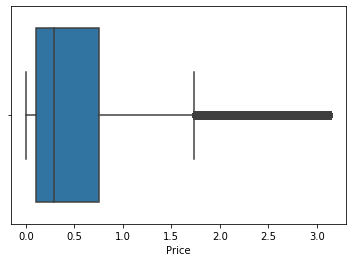

In [60]:
#Finding outliers and replacing them with NaN's
Q1 =  np.percentile(df.Price, 25)
Q3 =  np.percentile(df.Price, 75)
IQR = Q3-Q1

outliers = df[(df.Price< Q1-1.5*IQR) | (df.Price> Q3+1.5*IQR)]

for p in outliers.index:
    df.loc[df.index == p, ['Price']] = np.nan

#Viewing the outliers using boxplot    
price_outliers = sns.boxplot(df.Price)